In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

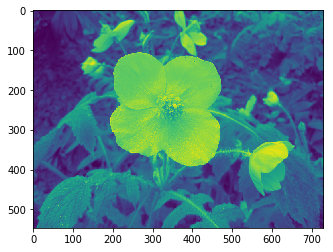

In [2]:
gray_img = cv2.imread("img/image.jpg", 0)
cv2.imwrite("img/gray_image.jpg", gray_img)
plt.imshow(gray_img)
plt.show()

- cvtColor方法

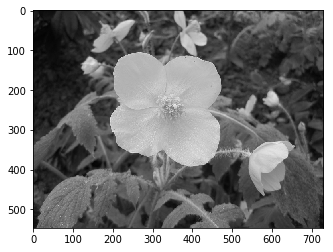

In [3]:
img = cv2.imread("img/image.jpg", 1) #彩图
dst_gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bgr_img = cv2.cvtColor(dst_gray_image, cv2.COLOR_GRAY2RGB)
plt.imshow(bgr_img)
plt.show()

- Python代码实现
- gray = (int(b) + int(g) + int(r)) / 3

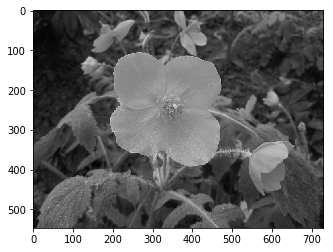

In [4]:
def cerate_gray_image(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            (b, g, r) = img[i, j]
            gray = (int(b) + int(g) + int(r)) / 3 #均值作为灰度值
            dst[i, j] = np.uint8(gray)

    plt.imshow(dst)
    plt.show()    

cerate_gray_image(img)

- b, g, r乘以特定系数
- 心理学公式：$(b * 0.299 + g * 0.587 + b * 0.114) / 3 $

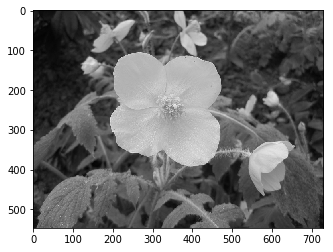

In [5]:
def cerate_gray_image_2(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            (b, g, r) = img[i, j]
            b = int(b)
            g = int(g)
            r = int(r)
            gray = (b * 0.299 + g * 0.587 + b * 0.114) / 3 #均值作为灰度值
            dst[i, j] = np.uint8(gray)

    plt.imshow(bgr_img)
    plt.show()      

cerate_gray_image_2(img)

- 浮点转定点

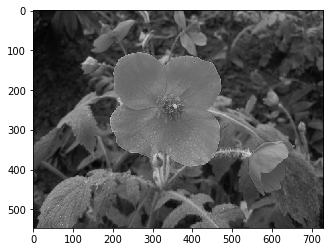

In [6]:
def cerate_gray_image_3(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            (b, g, r) = img[i, j]
            b = int(b)
            g = int(g)
            r = int(r)
            gray = (b * 1 + g * 2 + b * 1) / 4 # 1+2+1=4
            dst[i, j] = np.uint8(gray)

    plt.imshow(dst)
    plt.show()    

cerate_gray_image_3(img)

-  使用移位操作优化

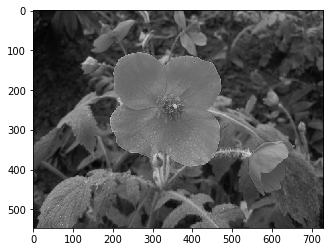

In [7]:
def cerate_gray_image_4(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            (b, g, r) = img[i, j]
            b = int(b)
            g = int(g)
            r = int(r)
            gray = (b * 1 + (g<<1) + b * 1) >> 2
            dst[i, j] = np.uint8(gray)

    plt.imshow(dst)
    plt.show()     

cerate_gray_image_4(img)

## 2.颜色反转

- 灰度图颜色反转

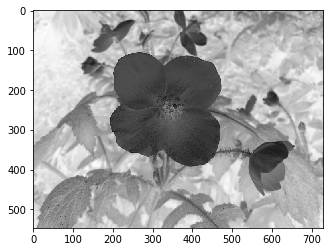

In [8]:
def flip_gray_image_color(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            grayPixel = image[i, j]
            dst[i, j] = 255 - grayPixel
    
    plt.imshow(dst)
    plt.show()
            
flip_gray_image_color(gray_img)

- 彩色图片颜色反转

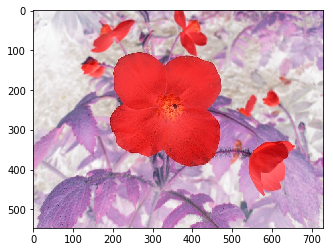

In [9]:
def flip_color_image_color(image):
    height = image.shape[0]
    width = image.shape[1]

    dst = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            (b, g, r) = img[i, j]
            dst[i, j] = (255 - b, 255 - g, 255 - r)
    
    plt.imshow(dst)
    plt.show()
            
flip_color_image_color(img)

## 3.马赛克

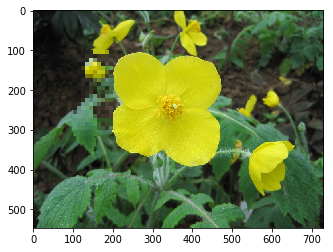

In [10]:
# 10 * 10
def ma_sai_ke(image):
    for m in range(100, 300):
        for n in range(100, 200):
            if m % 10 == 0 and n % 10 == 0:
                for i in range(0, 10):
                    for j in range(0, 10):
                        (b, g, r) = image[m, n]
                        image[i+m, j+n] = (b, g, r)

    
    bgr_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(bgr_img)
    plt.show()

ma_sai_ke(img)    

## 4.毛玻璃

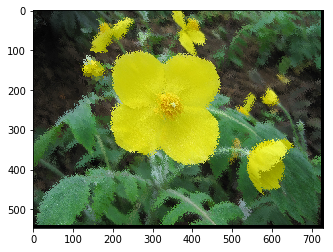

In [11]:
# 随机填充
def mao_bo_li(image):
    height = image.shape[0]
    width = image.shape[1]
    mm = 8
    dst = np.zeros((height, width, 3), np.uint8)
    
    for m in range(0, height-mm): #防止越界
        for n in range(0, width-mm):
            index = int(np.random.random() * 8) # 0~8
            (b, g, r) = image[m+index, n+index]
            dst[m, n] = (b, g, r)
    
    bgr_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.imshow(bgr_img)
    plt.show()
    
mao_bo_li(img)

## 5.图片融合
$dst = src1 * a + src2 *(1-a)$

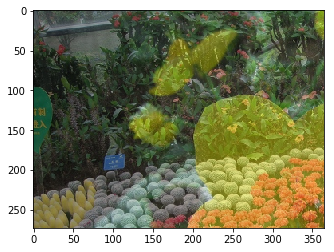

In [12]:
img0 = cv2.imread("img/image0.JPG", 1)
img1 = cv2.imread("img/image1.JPG", 1)

height = img0.shape[0]
width = img0.shape[1]

# ROT区
roiH = int(height / 2)
roiW = int(width / 2)
img0ROI = img0[0:roiH, 0:roiW]
img1ROI = img1[0:roiH, 0:roiW]

dst_img = np.zeros((roiH, roiW, 3), np.uint8)
dst_img = cv2.addWeighted(img0ROI, 0.5, img1ROI, 0.5, 0)
bgr_img = cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB)
plt.imshow(bgr_img)
plt.show()

## 6.边缘检测

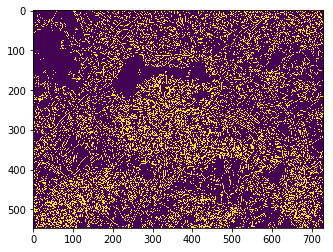

In [13]:
def edge_test():
    img = cv2.imread("img/image.jpg", 1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = img.shape[0]
    width = img.shape[1]

    imgG = cv2.GaussianBlur(gray, (3, 3), 0)
    dst = cv2.Canny(img, 50, 5)
    
    plt.imshow(dst)
    plt.show()
    
edge_test()

In [14]:
import random
import math

def my_edge_test():
    img = cv2.imread('img/image0.jpg',1)
    imgInfo = img.shape
    height = imgInfo[0]
    width = imgInfo[1]
    # sobel 1 算子模版 2 图片卷积 3 阈值判决 
    # [1 2 1          [ 1 0 -1
    #  0 0 0            2 0 -2
    # -1 -2 -1 ]       1 0 -1 ]

    # [1 2 3 4] [a b c d] a*1+b*2+c*3+d*4 = dst
    # sqrt(a*a+b*b) = f>th
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    dst = np.zeros((height,width,1),np.uint8)
    for i in range(0,height-2):
        for j in range(0,width-2):
            gy = gray[i,j]*1+gray[i,j+1]*2+gray[i,j+2]*1-gray[i+2,j]*1-gray[i+2,j+1]*2-gray[i+2,j+2]*1
            gx = gray[i,j]+gray[i+1,j]*2+gray[i+2,j]-gray[i,j+2]-gray[i+1,j+2]*2-gray[i+2,j+2]
            grad = math.sqrt(gx*gx+gy*gy)
            if grad>50:
                dst[i,j] = 255
            else:
                dst[i,j] = 0
    cv2.imshow('dst',dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
my_edge_test()

## 7.浮雕

In [15]:
def fu_diao():
    img = cv2.imread('img/image0.jpg',1)
    imgInfo = img.shape
    height = imgInfo[0]
    width = imgInfo[1]
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # newP = gray0-gray1+150
    dst = np.zeros((height,width,1),np.uint8)
    for i in range(0,height):
        for j in range(0,width-1):
            grayP0 = int(gray[i, j])
            grayP1 = int(gray[i, j+1])
            newP = grayP0 - grayP1 + 150
            if newP > 255:
                newP = 255
            if newP < 0:
                newP = 0
            dst[i, j] = newP
    
    cv2.imshow('dst',dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
fu_diao()

## 8.颜色风格

In [16]:
def color_style():
    img = cv2.imread('img/image0.jpg',1)
    imgInfo = img.shape
    height = imgInfo[0]
    width = imgInfo[1]
    
    dst = np.zeros((height,width,3),np.uint8)
    for i in range(0,height):
        for j in range(0,width-1):
            b, g, r = img[i, j]
            b = b*.15
            g = g*1.3
            if b > 255:
                b = 255
            if g > 255:
                g = 255
            dst[i, j] = (b, g, r)
    
    cv2.imshow('dst',dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 
color_style()

## 9.油画

In [17]:
def you_hua():
    img = cv2.imread('img/image00.jpg',1)
    imgInfo = img.shape
    height = imgInfo[0]
    width = imgInfo[1]
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    dst = np.zeros((height,width,3),np.uint8)
    
    for i in range(4, height-4):
        for j in range(4, width - 4):
            array1 = np.zeros(8, np.uint8) # 8个灰度等级
            for m in range(-4, 4):
                for n in range(-4, 4):
                    p1 = int(gray[i+m, j+n] / 32)
                    array1[p1] = array1[p1] + 1 # 1 ~8
            currentMax = array1[0] #记录最大值
            l = 0 # 记录下标
            for k in range(0, 8):
                if currentMax < array1[k]:
                    currentMax = array1[k]
                    l = k
            for mm in range(-4, 4):
                for nn in range(-4, 4):
                    if gray[i+mm, j+nn] >= (l*32) and gray[i+mm, j+nn] <= ((l+1)*32):
                        (b, g, r) = img[i+mm, j+nn]
            dst[i,j] = (b, g, r)

    cv2.imshow('dst',dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
you_hua()